In [25]:
## Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('aerofit_treadmill_data.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.describe()
"""AGE: Average is 29, Minimum is 18, and Maximum is 50
Education: Average is 15.5 years, Minimum is 12 years, Maximum is 21 years
Usage: Average is 3.5, Minimum is 2, Maximum is 5
Fitness: Average is 3.3, Minimum is 1, Maximum is 5
Income: Average is 53719.5, Minimum is 29562, Maximum is 104581
Miles Walked: Average is 103, Minimum is 21, Maximum 360"""


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.isna().sum()
# No missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [12]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Most sold product out of the three is the KP281 which is 44% of the treadmill's profits

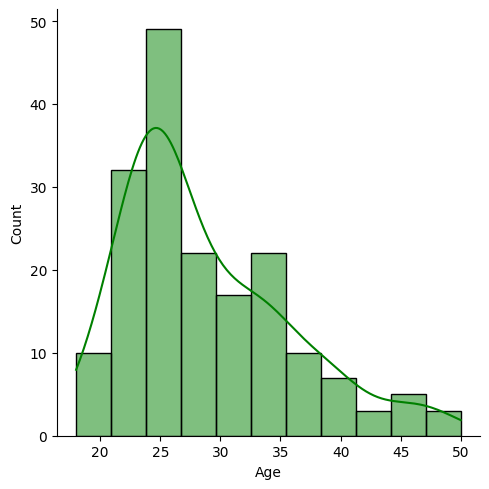

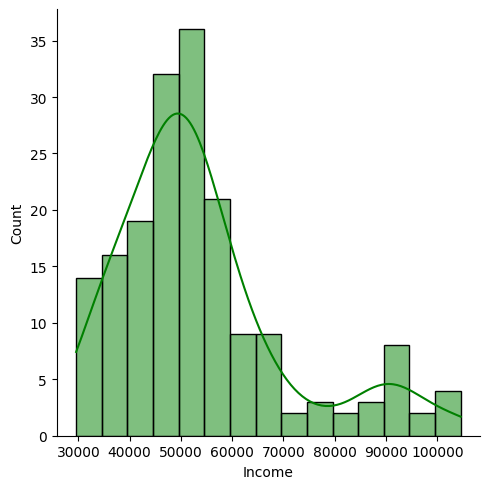

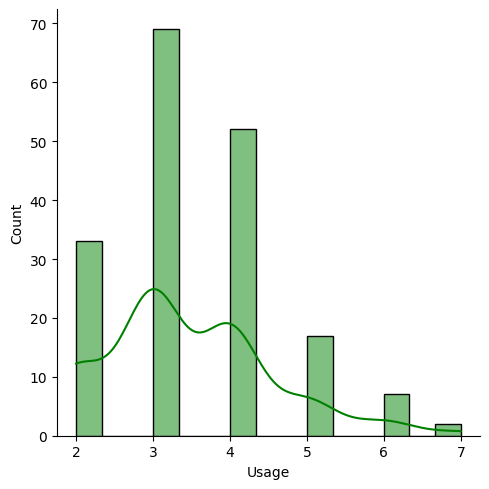

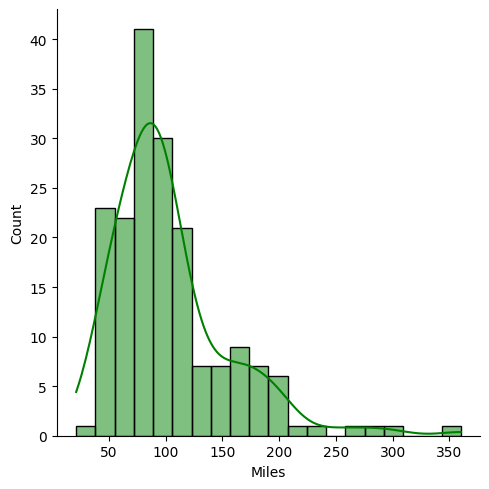

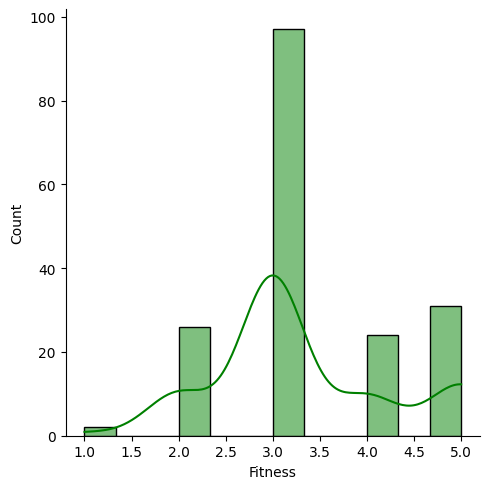

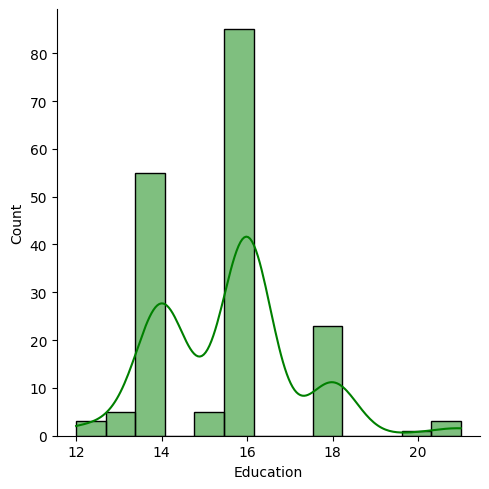

In [37]:
sns.displot(df['Age'], kde=True, color='green')
sns.displot(df['Income'], kde=True, color='green')
sns.displot(df['Usage'], kde=True, color='green')
sns.displot(df['Miles'], kde=True, color='green')
sns.displot(df['Fitness'], kde=True, color='green')
sns.displot(df['Education'], kde=True, color='green')

After looking at these distributions Miles and Income seem to have outliers due to the distribution being right skewed, but lets look deeper into these distributions with a boxplot

<Axes: xlabel='Age'>

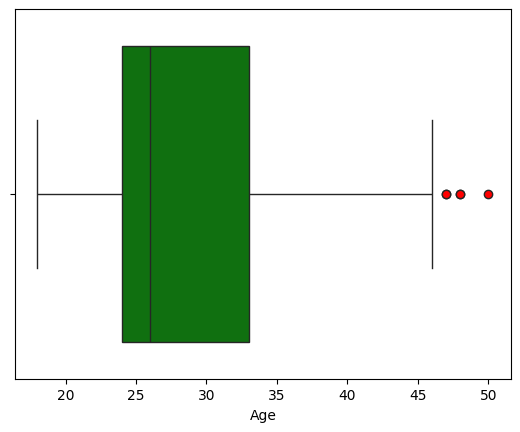

In [48]:
sns.boxplot(data=df, x='Age', color='green', flierprops=dict(markerfacecolor='r'))

<Axes: xlabel='Miles'>

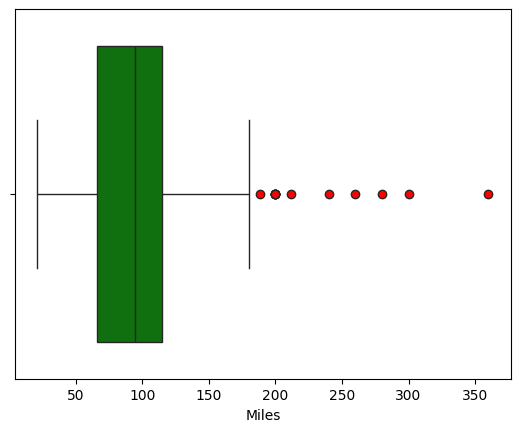

In [49]:
sns.boxplot(data=df, x='Miles', color='green', flierprops=dict(markerfacecolor='r'))


<Axes: xlabel='Fitness'>

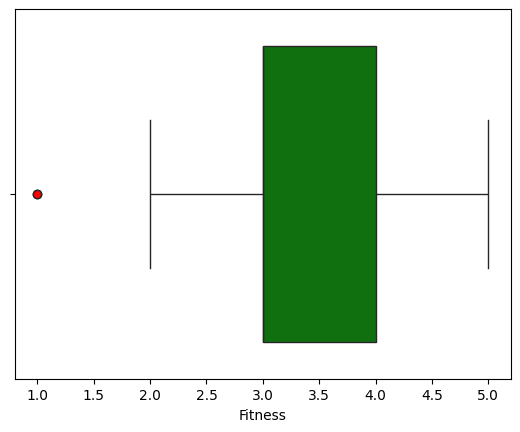

In [50]:
sns.boxplot(data=df, x='Fitness', color='green', flierprops=dict(markerfacecolor='r'))


<Axes: xlabel='Usage'>

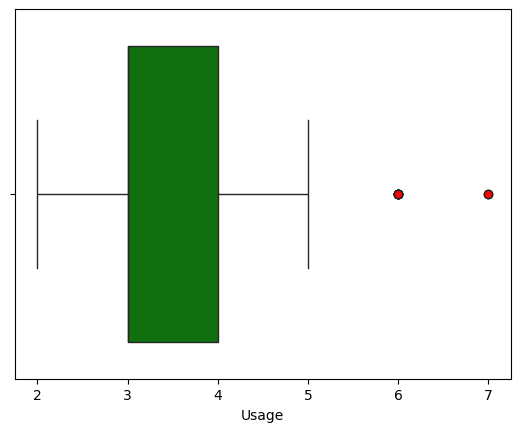

In [51]:
sns.boxplot(data=df, x='Usage', color='green', flierprops=dict(markerfacecolor='r'))


<Axes: xlabel='Education'>

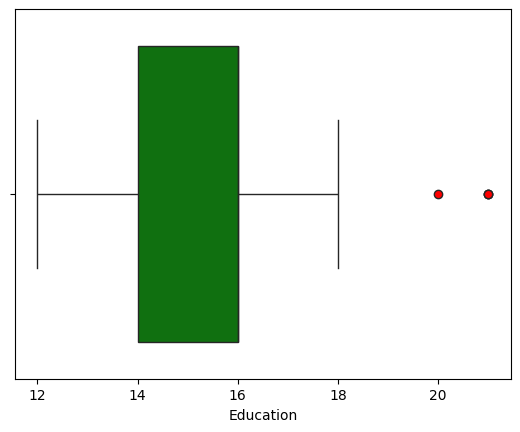

In [52]:
sns.boxplot(data=df, x='Education', color='green', flierprops=dict(markerfacecolor='r'))


<Axes: xlabel='Income'>

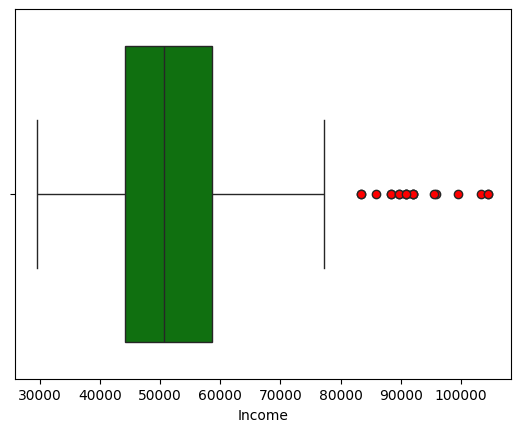

In [46]:
sns.boxplot(data=df, x='Income', color='green', flierprops=dict(markerfacecolor='r'))


Boxplot shows that Income and Miles contain many outliers

Text(0.5, 1.0, 'Product and Gender')

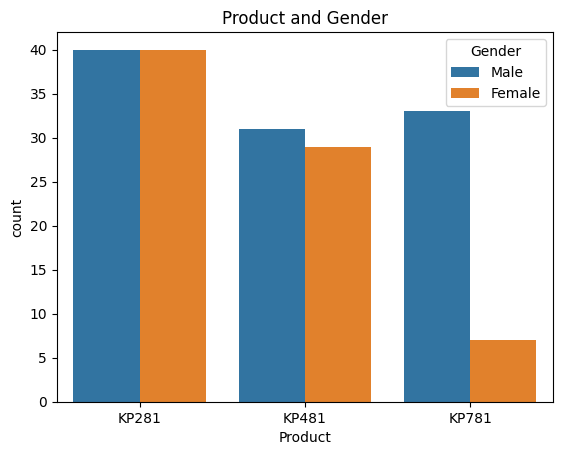

In [72]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product and Gender')

Text(0.5, 1.0, 'Product and Marital Status')

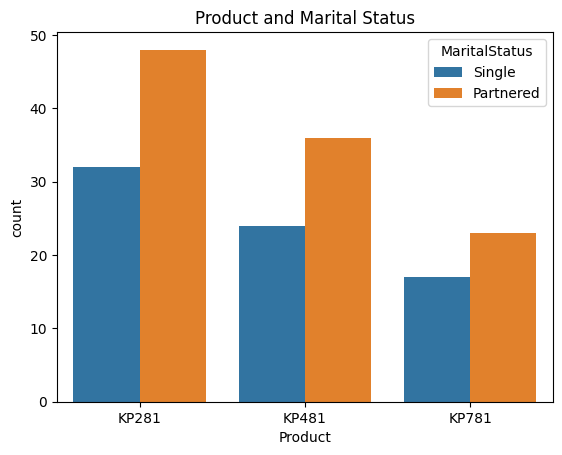

In [71]:
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product and Marital Status')

<Axes: xlabel='Age', ylabel='count'>

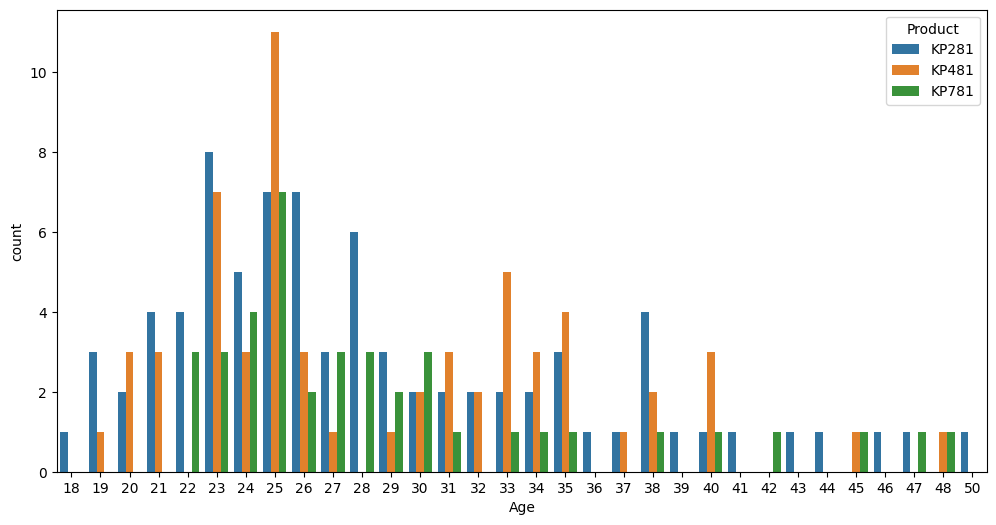

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Age', hue='Product')


<Axes: xlabel='Product', ylabel='count'>

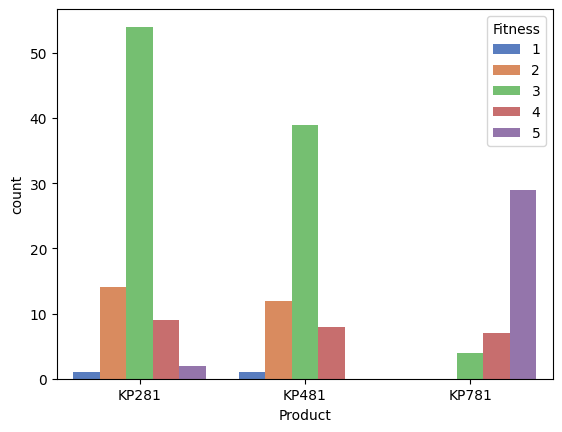

In [84]:
sns.countplot(data=df, x='Product', hue='Fitness', palette='muted' )
### Average level of fitness is the most common for the first two products, however the KP781 sees a much higher amount of 5 star level fitness. 

<Axes: xlabel='Product', ylabel='count'>

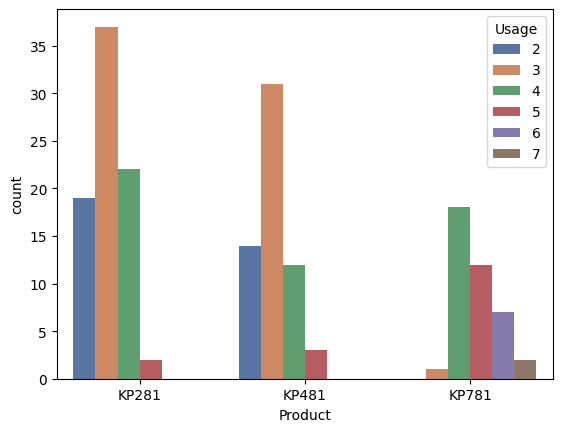

In [90]:
sns.countplot(data=df, x='Product', hue='Usage', palette='deep')

<Axes: xlabel='Age', ylabel='count'>

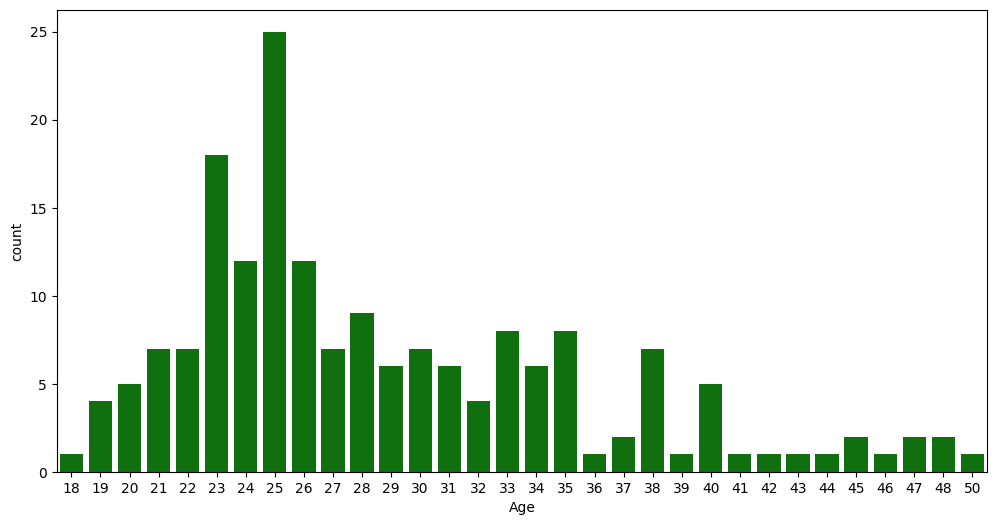

In [97]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Age', color='g')

Text(0.5, 1.0, 'Product vs Age')

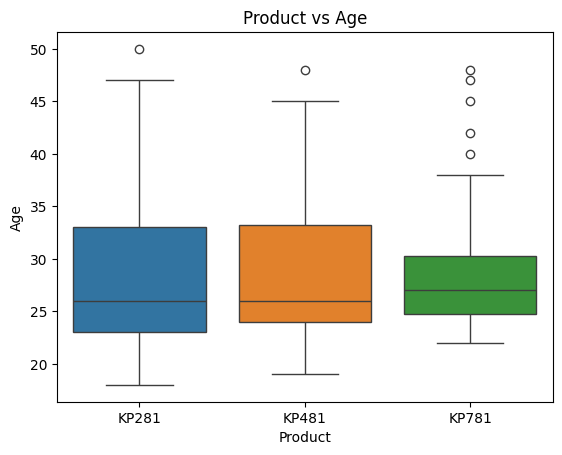

In [109]:
sns.boxplot(data=df, x='Product', y='Age', hue='Product')
plt.title('Product vs Age')

Text(0.5, 1.0, 'Product vs Fitness')

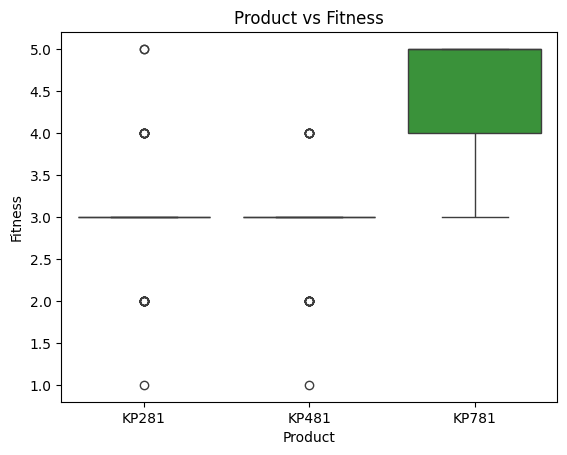

In [110]:
sns.boxplot(data=df, x='Product', y='Fitness', hue='Product')
plt.title('Product vs Fitness')

Text(0.5, 1.0, 'Product vs Income')

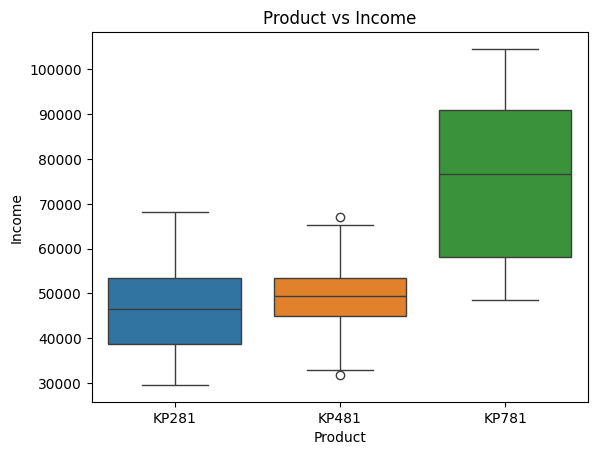

In [108]:
sns.boxplot(data=df, x='Product', y='Income', hue='Product')
plt.title('Product vs Income')

In [115]:
df_new = df.drop(columns=['Product', 'Gender', 'MaritalStatus'])
df_new.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

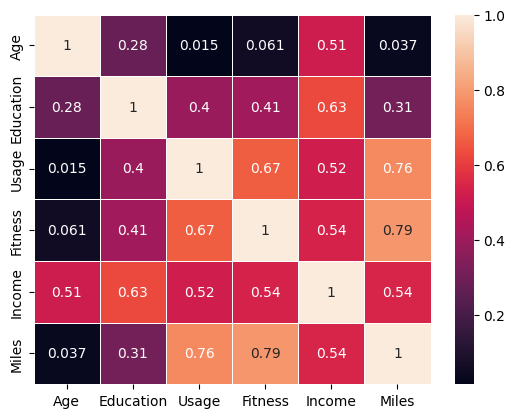

In [116]:
sns.heatmap(data=df_new.corr(), annot=True, linewidths=0.5)
"""Age is not correlated to Usage so it should not be regarded when purchasing treadmills.
Miles and Fitness and Miles and Usage are highly correlated meaning that if their fitness level is high then they use the treadmill more



In [122]:
### finding the probability of a treadmill purchase based on gender

def prob_gender(gender):
    pd_gender = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    prob_281 = pd_gender['KP281'][gender]/pd_gender.loc[gender].sum()
    prob_481 = pd_gender['KP481'][gender]/pd_gender.loc[gender].sum()
    prob_781 = pd_gender['KP781'][gender]/pd_gender.loc[gender].sum()
    print(f"P(KP281/{gender}): {prob_281:.2f}") 
    print(f"P(KP481/{gender}): {prob_481:.2f}")
    print(f"P(KP781/{gender}): {prob_781:.2f}\n")
    
prob_gender('Male')
prob_gender('Female')

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



Females are unlikely to buy the KP781 and are more likely to but the KP281
Males are more likely to buy the KP781

In [125]:
df_gender_product = df.copy()
bins = [14,20,30,40,60]
labels = ['Teen', '20s', '30s', 'Above 40s']
df_gender_product['Age Group'] = pd.cut(df_gender_product['Age'], bins)
df_gender_product['Age Category'] = pd.cut(df_gender_product['Age'], bins, labels=labels)
product_age = pd.crosstab(index=df_gender_product['Product'], columns=df_gender_product['Age Category'], margins=True)
product_age


Age Category,Teen,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [126]:
df_income_product = df.copy()
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
df_income_product['IncomeCategory'] = pd.cut(df_income_product['Income'],bins_income,labels = labels_income)
product_income = pd.crosstab(index=df_income_product['Product'], columns=[df_income_product['IncomeCategory']],margins=True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [129]:
product_fitness = pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180
